## Community detection

Selezionare 3 algorimi tra quelli visti a lezione e, sfruttando le implementazioni fornite da CDlib, estrarre le relative partizioni del grafo selezionato. 
Fornire una comparazione degli algoritmi selezionati ed una valuazione/caratterizzazione delle
comunità identificate.

Arxiv HEP-TH (high energy physics theory) citation graph is from arXiv and covers all the citations. Edges from u to v indicate that a paper u cited another paper v. If a paper cites, or is cited by, a paper outside the dataset, the graph does not contain any information about this. The data is of the papers in the period from January 1993 to April 2003.

In [ ]:
#! pip install cdlib==0.4.0

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import cdlib
from cdlib import algorithms, viz, LifeCycle
from cdlib import evaluation
import numpy as np

In [4]:
input_file = 'cit-HepTh.edges'
output_file = 'cit-HepTh_2.edges'
 
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        columns = line.split()
        if len(columns) > 2:
            del columns[2]
        outfile.write(' '.join(columns) + '\n')

In [5]:
def read_custom_edgelist(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                u, v = parts[:2]
                G.add_edge(u, v)
    return G

G = read_custom_edgelist('cit-HepTh_2.edges')

In [6]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 22910
Number of edges: 2444799


Metodi scelti:
- Louvain : Fornisce una buona combinazione di modularità elevata e comunità ben definite, risultando in un numero moderato di comunità di dimensioni variabili.

- Label Propagation: Rapido ma meno stabile, utile per una prima esplorazione.

- Infomap: Questo algoritmo spesso rileva più comunità di dimensioni minori, catturando dettagli nella struttura gerarchica del grafo.

In [7]:
#Calcoliamo le comunità con vari metodi
c1 = algorithms.label_propagation(G)

In [8]:
c2 = algorithms.louvain(G)

In [10]:
c3 = algorithms.infomap(G)

In [11]:
# Lunghezza delle comunità
len(c1.communities)

174

In [24]:
# Da quanti elementi è composta ogni comunità
[len(c) for c in c1.communities]

[22189,
 87,
 48,
 17,
 12,
 11,
 11,
 10,
 10,
 10,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

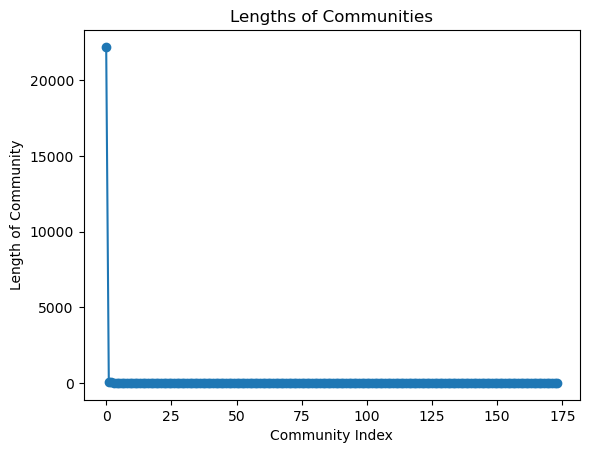

In [20]:
# Plottare la lunghezza delle community 

community_lengths = np.array([len(c) for c in c1.communities])

plt.plot(community_lengths, marker='o')
plt.title('Lengths of Communities')
plt.xlabel('Community Index')
plt.ylabel('Length of Community')
plt.show()

In [9]:
len(c2.communities)

89

In [25]:
[len(c) for c in c2.communities]

[2841,
 2782,
 2643,
 2507,
 2385,
 2357,
 1723,
 1673,
 1593,
 1250,
 651,
 245,
 51,
 11,
 9,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

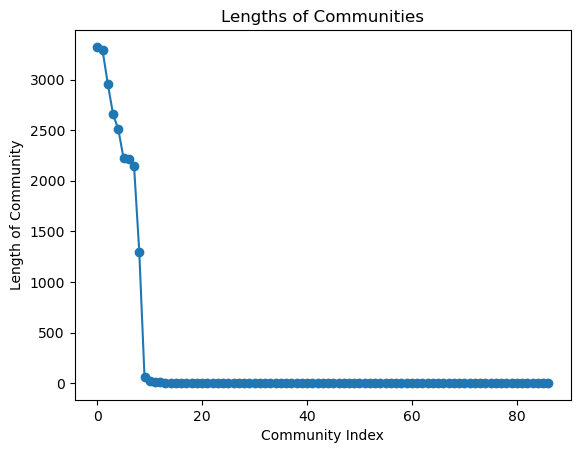

In [23]:
# Plottare la lunghezza delle community 

community_lengths = np.array([len(c) for c in c2.communities])

plt.plot(community_lengths, marker='o')
plt.title('Lengths of Communities')
plt.xlabel('Community Index')
plt.ylabel('Length of Community')
plt.show()

In [10]:
len(c3.communities)

458

In [26]:
[len(c) for c in c3.communities]

[6373,
 1704,
 1350,
 807,
 787,
 483,
 451,
 400,
 346,
 274,
 264,
 263,
 245,
 213,
 200,
 196,
 192,
 158,
 154,
 152,
 151,
 145,
 144,
 139,
 138,
 138,
 136,
 135,
 121,
 121,
 114,
 112,
 107,
 103,
 103,
 102,
 99,
 97,
 96,
 94,
 90,
 90,
 90,
 86,
 84,
 83,
 81,
 80,
 77,
 75,
 72,
 72,
 71,
 66,
 64,
 64,
 63,
 61,
 61,
 59,
 57,
 57,
 54,
 53,
 49,
 48,
 47,
 47,
 46,
 46,
 44,
 43,
 43,
 42,
 41,
 40,
 39,
 38,
 35,
 35,
 34,
 33,
 32,
 31,
 31,
 31,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 27,
 27,
 26,
 26,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 

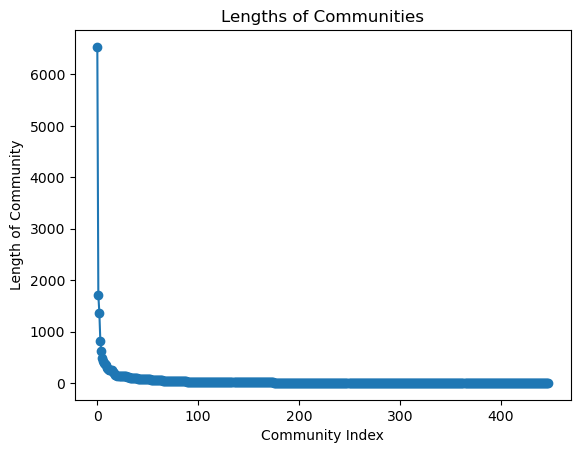

In [24]:
# Plottare la lunghezza delle community 

community_lengths = np.array([len(c) for c in c3.communities])

plt.plot(community_lengths, marker='o')
plt.title('Lengths of Communities')
plt.xlabel('Community Index')
plt.ylabel('Length of Community')
plt.show()

## Considerazioni sulla suddivisione delle comunità
- Essendo un grafo su un argomento molto specifico, ogni argomento tende a formare un cluster di articoli strettamente correlati, poiché i ricercatori citano prevalentemente lavori all'interno dello stesso tema.
- I ricercatori tendono a lavorare in gruppi o collaborazioni che producono insiemi di articoli correlati.
- Gli articoli tendono a citare lavori precedenti dello stesso campo, creando cluster densi all'interno di sottodiscipline specifiche.

## Dimensioni

In [11]:
c1.size()

FitnessResult(min=2, max=22189, score=131.66666666666666, std=1677.004833245262)

Caratterizzata da una grande variabilità nelle dimensioni delle comunità, con alcune comunità molto grandi. Questo potrebbe indicare la presenza di un hub o di un nodo altamente centrale che domina una grande comunità.

La grande variabilità delle dimensioni delle comunità potrebbe essere dovuta alla presenza di numerose piccole comunità locali e alcune comunità più grandi dominate da lavori molto citati.

In [12]:
c2.size()

FitnessResult(min=2, max=2841, score=257.4157303370786, std=709.3481706244734)

Mostra una moderata variabilità nelle dimensioni delle comunità, con comunità generalmente più grandi rispetto a c1 ma senza dimensioni estreme. Questo potrebbe indicare una struttura comunitaria più equilibrata.

Louvain tende a rilevare comunità con alta densità interna, risultando in cluster più grandi e densi. Questa caratteristica è particolarmente utile per identificare sottodiscipline ben definite e collaborazioni di ricerca estese.

In [13]:
c3.size()

FitnessResult(min=2, max=6373, score=50.02183406113537, std=320.9686410210614)

Caratterizzata da comunità di dimensioni più uniformi e generalmente più piccole. Questo potrebbe indicare una suddivisione più fine della rete in comunità di dimensioni simili.

La maggiore variabilità nelle dimensioni delle comunità riflette la capacità di Infomap di identificare sia cluster piccoli e densi sia cluster più grandi e distribuiti.

## Overlap? Copertura? 

Nel nostro caso gni nodo è associato ad una sola comunità

Nel nostro caso ciascun nodo nel grafo originale è associato a una comunità

In [17]:
c1.overlap

False

In [21]:
c1.node_coverage

1.0

In [19]:
c2.overlap

False

In [22]:
c2.node_coverage

1.0

In [20]:
c3.overlap

False

In [23]:
c3.node_coverage

1.0

## Valutazione degli algoritmi

Non c'è un modo per un algoritmo di comunità fa una "buona comunità". È possibile comunque valutare un criterio statistico.

Confrontiamo i risultati dei diversi algoritmi attraverso l'analisi della modularità.

In [14]:
c1.newman_girvan_modularity()

FitnessResult(min=None, max=None, score=0.0025979156938785945, std=None)

In [15]:
c2.newman_girvan_modularity() # Louvain sembra trovare un partizionamento con qualità migliore rispetto agli altri

FitnessResult(min=None, max=None, score=0.4132938359261489, std=None)

In [16]:
c3.newman_girvan_modularity()

FitnessResult(min=None, max=None, score=0.31653270762087177, std=None)

## Visualizzare le comunità

Per una visualizzazione più semplice utilizziamo viz.plot_community_graph, che permette di collassare tutte le comunità in nodi, generando le comunità di dimensione proporzionale al numero di nodi che fanno parte della comunità e gli archi sono pesati e di dimensione variabile in base al numero di archi che intercorrono tra le comunità

In [27]:
from cdlib import viz

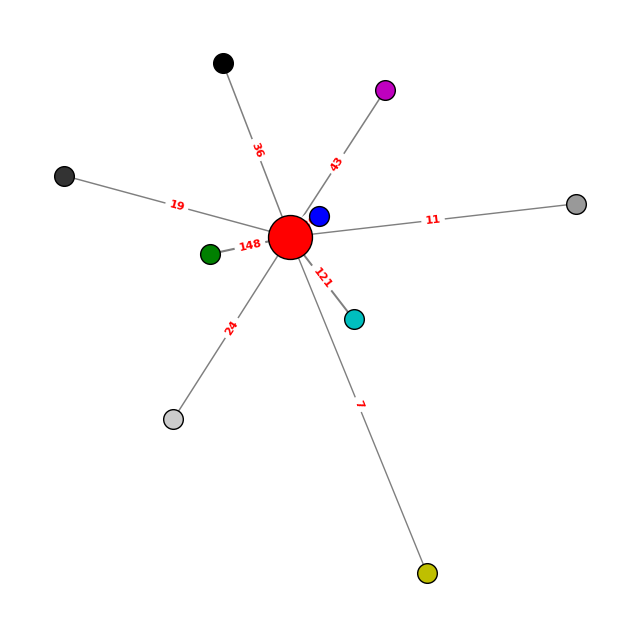

In [33]:
viz.plot_community_graph(G, c1, top_k=10) #top_k show the top K influential communities

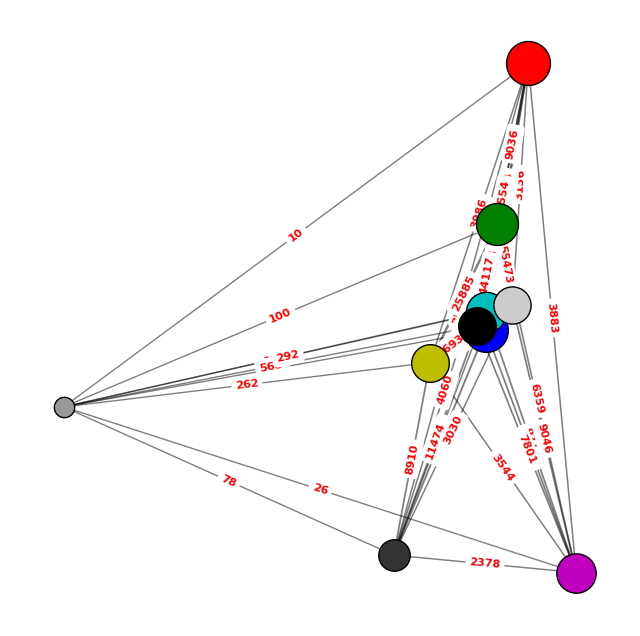

In [30]:
viz.plot_community_graph(G, c2, top_k=10)

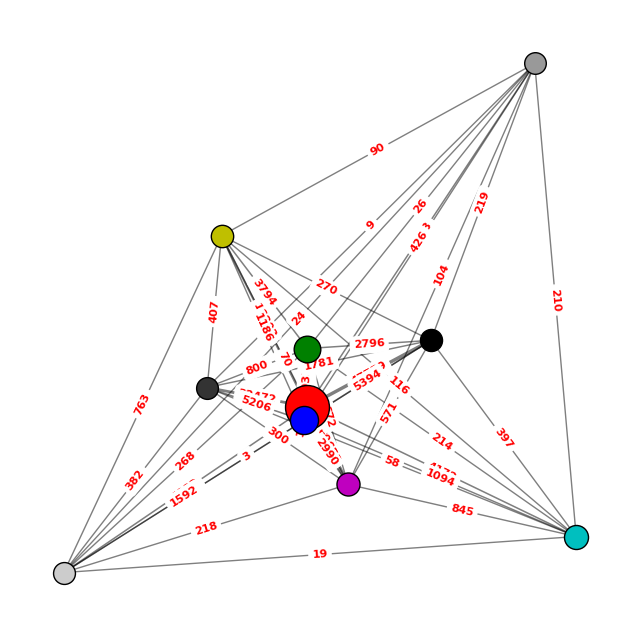

In [32]:
viz.plot_community_graph(G, c3, top_k=10)

<Axes: xlabel='Algorithm', ylabel='internal_edge_density'>

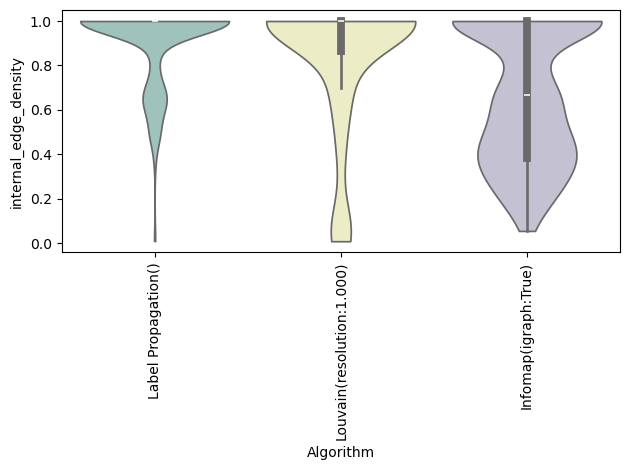

In [12]:
# How a given fitness function distributes over the communities
viz.plot_com_stat([c1, c2, c3], evaluation.internal_edge_density)

Label Propagation rileva comunità con un'ampia gamma di densità interne, da molto alte a molto basse. Questo potrebbe indicare che alcune comunità sono molto ben definite mentre altre sono meno coese.

Louvain rileva comunità con densità interne molto elevate e uniformi, confermando la sua capacità di creare comunità ben definite e dense.

Infomap rileva comunità con una varietà di densità interne, riflettendo la sua capacità di catturare strutture più complesse e gerarchiche.

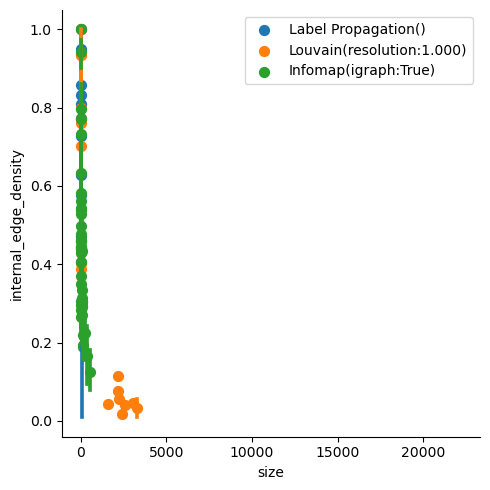

In [13]:
# pair-wise compare fitness functions for one or more clustering
viz.plot_com_properties_relation([c1, c2, c3], evaluation.size, evaluation.internal_edge_density)

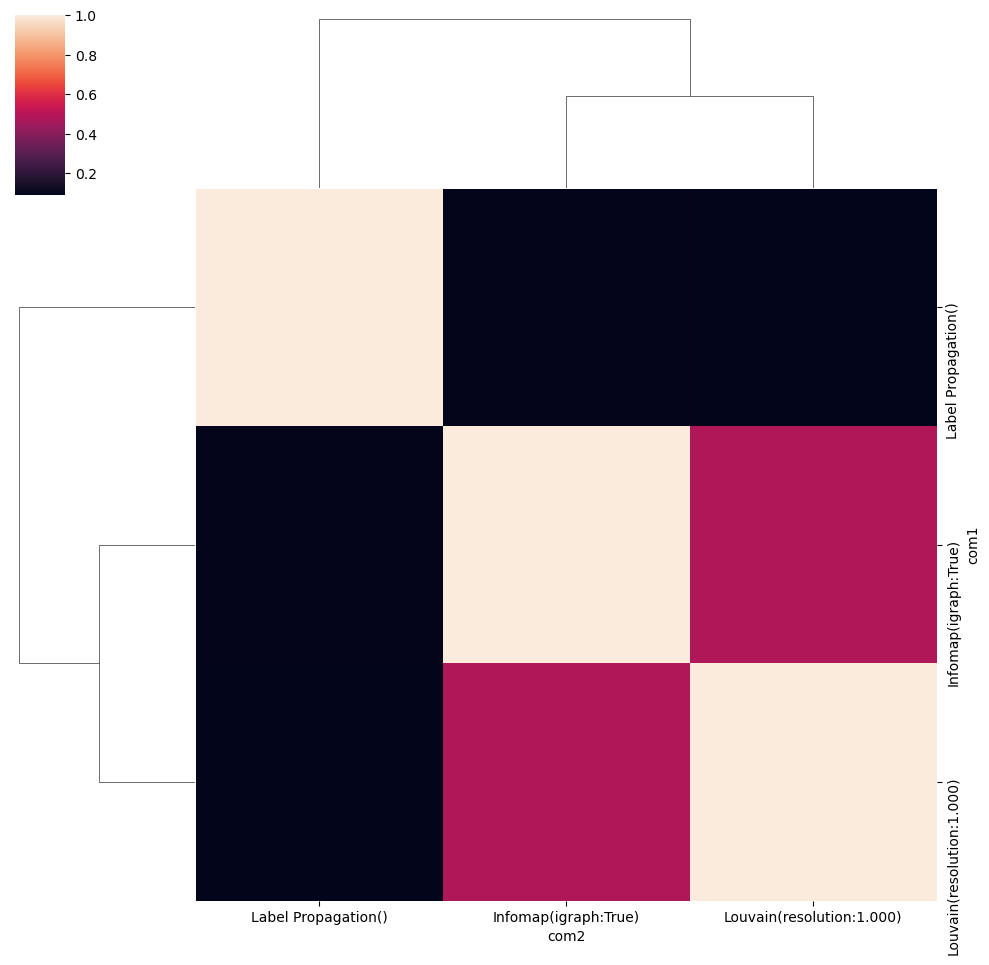

In [14]:
# we can also compare different clustering obtained on the same graph by alternative algorithms among them
viz.plot_sim_matrix([c1, c2, c3],evaluation.adjusted_mutual_information)

La matrice di similarità mostra che non esiste un'unica partizione che domini le altre in termini di similarità, il che suggerisce che i diversi algoritmi rilevano diverse strutture comunitarie nel grafo. 

Questo è comune nelle reti complesse dove la struttura delle comunità può essere interpretata in vari modi a seconda dell'algoritmo utilizzato. 

L'uso di più algoritmi consente di ottenere una visione più completa e dettagliata della struttura comunitaria della rete.

- Label Propagation vs Infomap:

La similarità è bassa (vicina a 0), indicando che le comunità rilevate da questi due algoritmi sono molto diverse. Questo è prevedibile poiché Label Propagation e Infomap adottano approcci diversi (locale vs globale) per identificare le comunità.

- Label Propagation vs Louvain:

Anche qui la similarità è bassa, suggerendo che Label Propagation e Louvain trovano strutture comunitarie significativamente diverse. Louvain tende a rilevare comunità su base di ottimizzazione della modularità, mentre Label Propagation si basa sulla propagazione locale delle etichette.

- Infomap vs Louvain:

La similarità è moderata, indicando che Infomap e Louvain trovano alcune strutture comunitarie comuni ma non completamente sovrapposte. Entrambi gli algoritmi cercano di massimizzare la modularità, ma con approcci diversi.